# 43.统计分析

## 43.1 业务理解

## 43.2 数据读入

In [3]:
import os
os.chdir(r'C:\Users\soloman\clm')

print(os.getcwd())

C:\Users\soloman\clm


In [4]:
import pandas as pd
import numpy as np    
df_women = pd.read_csv('women.csv', index_col=0)

print(df_women.head())


   height  weight
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126


## 43.3 数据理解

In [5]:
df_women.shape

(15, 2)

In [6]:
print(df_women.columns)

Index(['height', 'weight'], dtype='object')


In [7]:
df_women.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


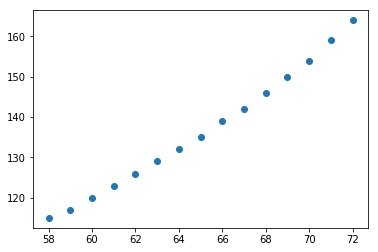

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_women["height"], df_women["weight"])
plt.show()

## 43.4 数据准备

In [9]:
X = df_women["height"]
y = df_women["weight"]

In [10]:
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [11]:
y

1     115
2     117
3     120
4     123
5     126
6     129
7     132
8     135
9     139
10    142
11    146
12    150
13    154
14    159
15    164
Name: weight, dtype: int64

## 43.5 模型类型的选择与超级参数的设置

In [12]:
import statsmodels.api as sm

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [14]:
X_add_const=sm.add_constant(X) 
X_add_const

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [15]:
myModel = sm.OLS(y, X_add_const)

## 43.6 训练具体模型及查看其统计量

In [16]:
results = myModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.09e-14
Time:                        20:03:13   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [17]:
results.params

const    -87.516667
height     3.450000
dtype: float64

## 43.7 模型优度的评价

In [18]:
results.rsquared

0.9910098326857505

## 43.8 建模前提假定条件的讨论

In [20]:
results.f_pvalue

1.0909729585997682e-14

In [21]:
sm.stats.stattools.durbin_watson(results.resid)

0.3153803748621851

In [22]:
sm.stats.stattools.jarque_bera(results.resid)

(1.6595730644309743,
 0.4361423787323869,
 0.7893583826332262,
 2.5963042257390008)

In [23]:
y_predict=results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

## 43.9 模型的优化与重新选择

Text(0,0.5,'体重')

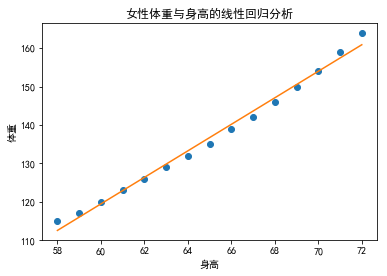

In [24]:
plt.rcParams['font.family']="simHei" #汉字显示
plt.plot(df_women["height"], df_women["weight"],"o")
plt.plot(df_women["height"], y_predict)
plt.title('女性体重与身高的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')   

In [26]:
import pandas as pd
import numpy as np    
df_women = pd.read_csv('women.csv', index_col=0)
X = df_women["height"]
y = df_women["weight"]

X=np.column_stack((X, np.power(X,2), np.power(X,3)))

In [27]:
X_add_const=sm.add_constant(X) 

X_add_const

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [28]:
myModel_updated = sm.OLS(y, X_add_const)

In [29]:
results_updated = myModel_updated.fit()
print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.07e-20
Time:                        20:03:14   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             5.312
Df Residuals:                      11   BIC:                             8.144
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -896.7476    294.575     -3.044      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [30]:
print('查看斜率及截距项: ',results_updated.params)

查看斜率及截距项:  const   -896.747633
x1        46.410789
x2        -0.746184
x3         0.004253
dtype: float64


In [31]:
y_predict_updated=results_updated.predict()
y_predict_updated

array([114.63856209, 117.40676937, 120.18801264, 123.00780722,
       125.89166846, 128.86511168, 131.95365223, 135.18280543,
       138.57808662, 142.16501113, 145.9690943 , 150.01585147,
       154.33079796, 158.93944911, 163.86732026])

Text(0,0.5,'体重')

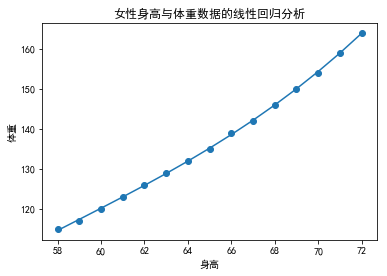

In [32]:
plt.rcParams['font.family']="simHei" 
plt.scatter(df_women["height"], df_women["weight"])
plt.plot(df_women["height"], y_predict_updated)
plt.title('女性身高与体重数据的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')   

## 43.10 模型的应用

In [33]:
h=63.5
results_updated.predict([1,h,np.power(h,2),np.power(h,3)])

array([130.39340008])